# Demos: Lecture 4

In [14]:
import pennylane as qml
from pennylane import numpy as np

## Exercise 1: $Y$-basis rotation

In [7]:
dev = qml.device('default.qubit', wires=1)
  
def convert_to_y_basis():
    # YOUR CODE HERE; find a circuit that sends 
    # |0> -> |p> and |1> -> |m>
    qml.Hadamard(wires=0)
    qml.S(wires=0)
    
@qml.qnode(dev)
def rotate_basis(is_one):
    if is_one:
        qml.PauliX(wires=0)

    #adjoint_rotation = qml.adjoint(convert_to_y_basis)
    #adjoint_rotation()
    convert_to_y_basis()
    
    return qml.probs(wires=0)

(<Figure size 500x200 with 1 Axes>, <Axes: >)

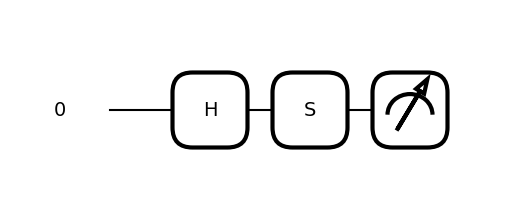

In [10]:
qml.draw_mpl(rotate_basis)(False)

In [4]:
rotate_basis(True)

tensor([0.5, 0.5], requires_grad=True)

## Demo 1: measuring in the $Y$ basis

<img src="fig/basis-rotation-hands-on.png" width=350>

In [12]:
dev = qml.device('default.qubit', wires=1, shots=100)
  
@qml.qnode(dev)
def rotate_basis(x, y, z):
    qml.RX(x, wires=0)
    qml.RY(y, wires=0)
    qml.RZ(z, wires=0)
    # Apply the basis rotation
    qml.adjoint(convert_to_y_basis)()
    return qml.probs(wires=0)

In [13]:
rotate_basis(0.23, 0.6, 0.1)

array([0.4, 0.6])

## Demo 2: `qml.ctrl`

Implement the following circuit; apply the controlled operations in two different ways.

<img src="fig/mq-circuit.png" width=350> 

In [ ]:
dev = qml.device("default.qubit", wires=3)

@qml.qnode(dev)
def qfunc(x, y, z):
    qml.ctrl(qml.RX, control=0)(x, wires=1)
    qml.ctrl(qml.RY, control=0)(y, wires=2)
    ...
    qml.CRX

In [ ]:
qml.ctrl(arbitrary_function, control=0)(params, wires)